In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Lead = pd.read_csv('Leads.csv')
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead.shape

(9240, 37)

In [4]:
Lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are lot of categorical columns available in our data. We have 4 columns with float values. 3 columns with integer values. 30 columns with categorical values.

# Data Cleaning

In [6]:
# Replacing 'Select' with NaN (Since it means no option is selected)
Lead_data = Lead.replace('select',np.nan)


In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

Lead_data.drop('Prospect ID', 1, inplace = True)

In [8]:
Lead_data.nunique()


Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [9]:
leadframe = Lead_data.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Receive More Updates About Our Courses','Magazine','Get updates on DM Content'],axis=1)

In [10]:
leadframe.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#checking null value
leadframe.isnull().sum() * 100 / len(leadframe)

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [12]:
#dropping columns with more than 35% missing values
leadframe = leadframe.drop('A free copy of Mastering The Interview', axis=1)

In [13]:
leadframe = leadframe.drop('Asymmetrique Profile Score', axis=1)

In [14]:
leadframe = leadframe.drop('Asymmetrique Activity Score', axis=1)

In [15]:
leadframe = leadframe.drop('Asymmetrique Activity Index', axis=1)

In [16]:
leadframe = leadframe.drop('Asymmetrique Profile Index', axis=1)

In [17]:
leadframe = leadframe.drop('Lead Quality', axis=1)

In [18]:
leadframe = leadframe.drop('Tags', axis=1)

In [19]:
leadframe.shape

(9240, 25)

In [20]:
#again checking the null value after droping the column which were missing value more than 35%
leadframe.isnull().sum() * 100 / len(leadframe)

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

There are huge null values still.Removing the rows with the null value will cost us a lot of data and they are important columns.So, instead we are going to replace the NaN values with 'not provided.

In [21]:
leadframe['Specialization'] = leadframe['Specialization'].fillna('not provided')
leadframe['City'] = leadframe['City'].fillna('not provided')
leadframe['What matters most to you in choosing a course'] = leadframe['What matters most to you in choosing a course'].fillna('not provided')
leadframe['What is your current occupation'] = leadframe['What is your current occupation'].fillna('not provided')
leadframe['Country'] = leadframe['Country'].fillna('not provided')
leadframe['How did you hear about X Education'] = leadframe['How did you hear about X Education'].fillna('not provided')
leadframe['Lead Profile'] = leadframe['Lead Profile'].fillna('not provided')
leadframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [22]:
#checking null values percentage
leadframe.isnull().sum() * 100 / len(leadframe)

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [23]:
leadframe.shape

(9240, 25)

In [24]:
leadframe['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [25]:
# since india is the most common occurence among the non missing value we can impute all not provided values with india
leadframe['Country'] = leadframe['Country'].replace('not provided','India')
leadframe['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leadframe['Country'] = Lead_data.apply(lambda x:slots(x['Country']), axis = 1)
leadframe['Country'].value_counts()


India            6492
outside india    2748
Name: Country, dtype: int64

In [27]:
leadframe.fillna(value = 0, inplace = True)

In [28]:
leadframe.isnull().sum() * 100 / len(leadframe)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [29]:
leadframe.shape

(9240, 25)

Text(0.5, 1.0, 'Country')

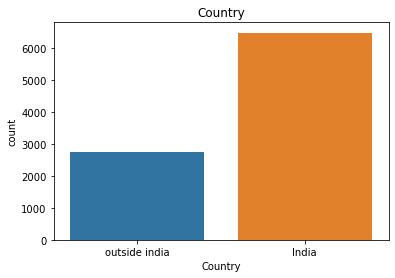

In [30]:
sns.countplot(leadframe['Country'])
plt.title('Country')

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped.

In [31]:
#creating a list of columns to be droppped
cols_to_drop=['Country']
#drop one column by name
leadframe.drop('Country', axis=1, inplace=True)

In [32]:
#checking value counts of "City" column

leadframe['City'].value_counts()

Mumbai                         3222
Select                         2249
not provided                   1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
leadframe = leadframe.replace('Select', np.nan)

Text(0.5, 1.0, 'City')

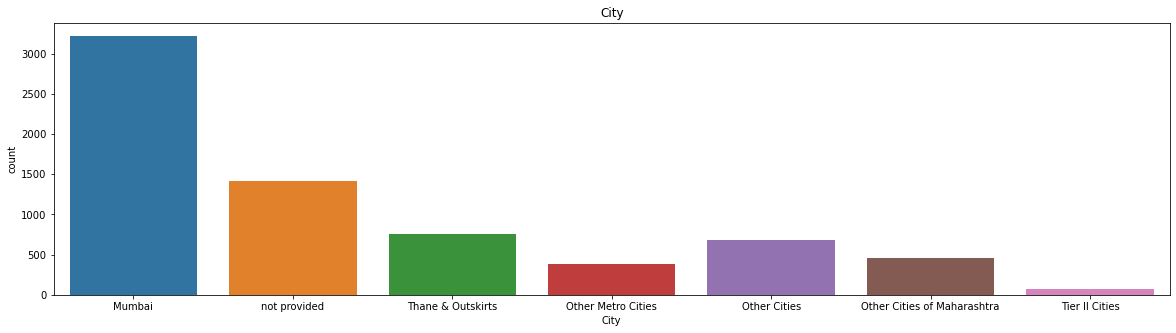

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(leadframe['City'])
plt.title('City')

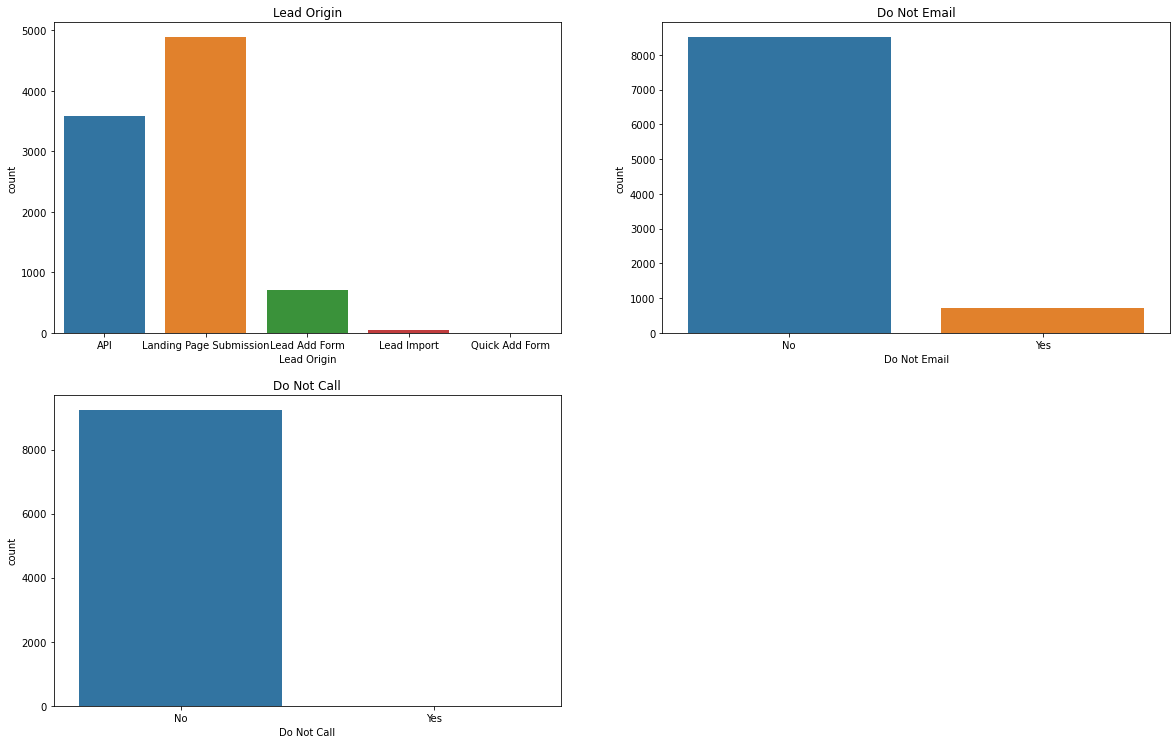

In [35]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leadframe['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leadframe['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leadframe['Do Not Call'])
plt.title('Do Not Call')


plt.show()

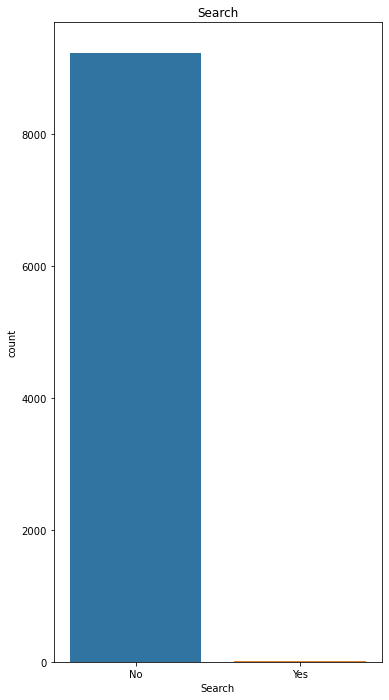

In [36]:
plt.figure(figsize = (20,40))

plt.subplot(3,3,2)
sns.countplot(leadframe['Search'])
plt.title('Search')


plt.show()


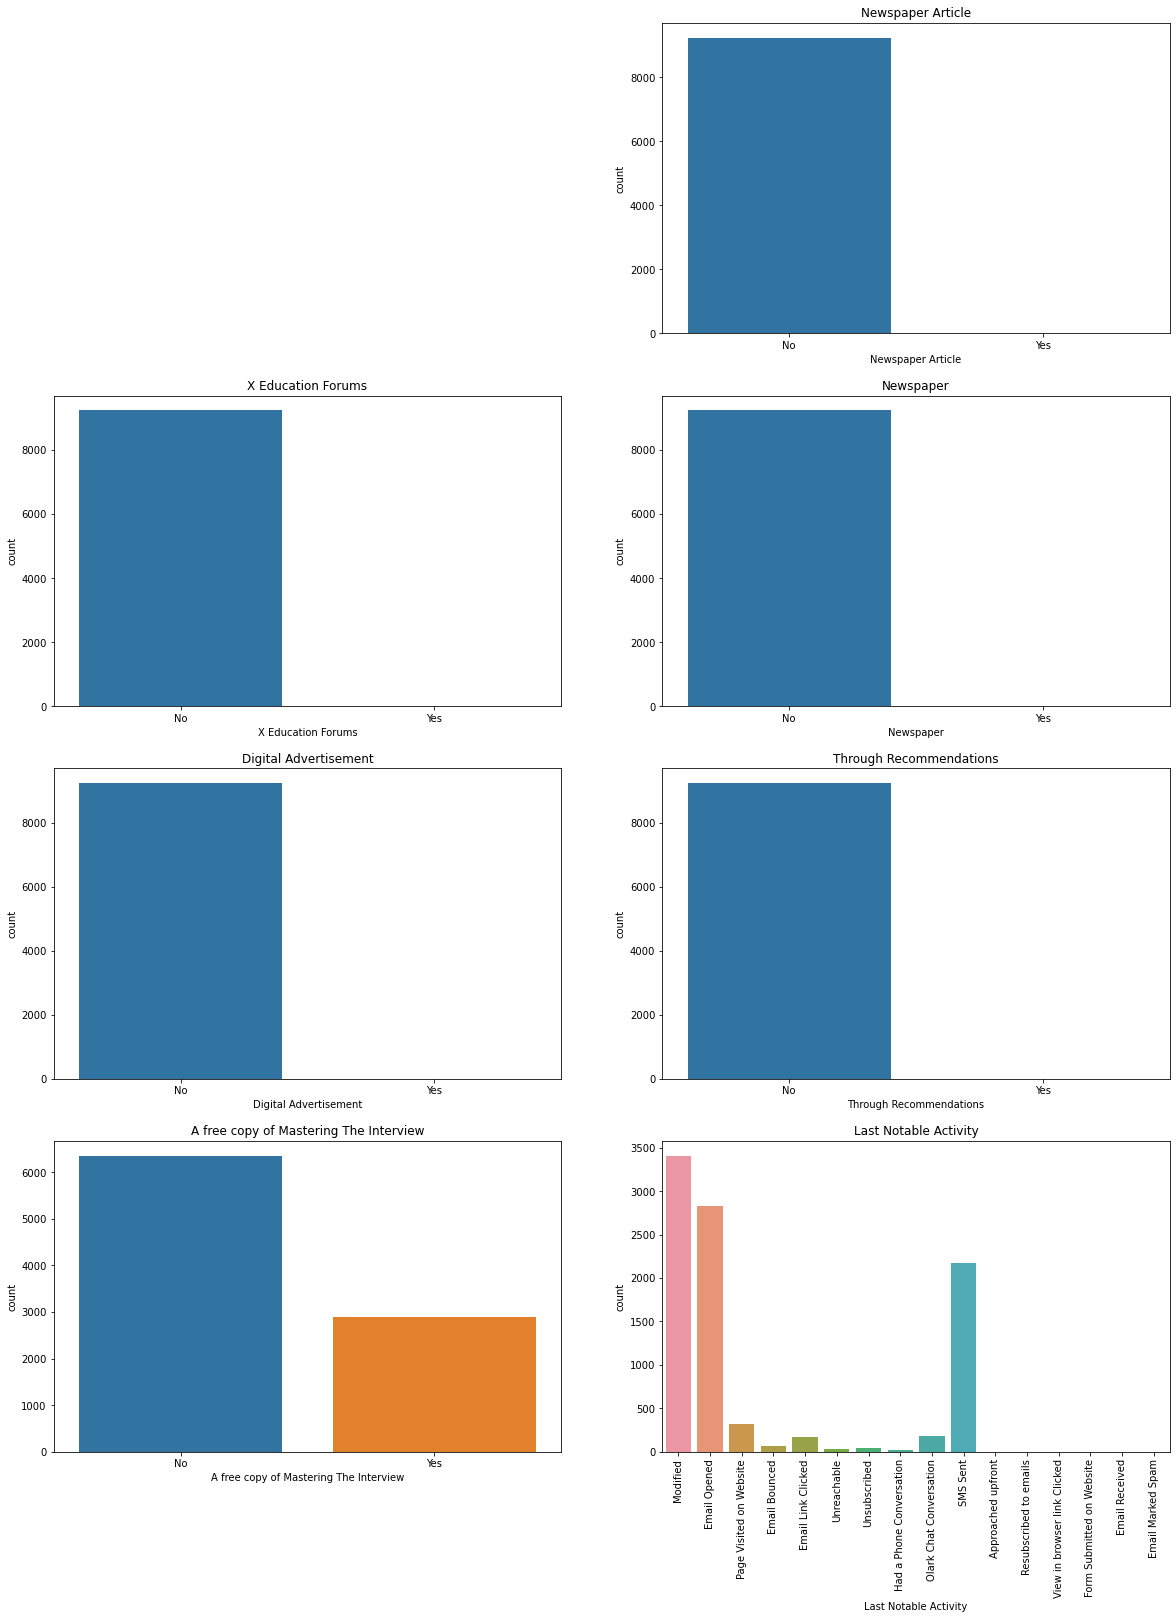

In [37]:
plt.figure(figsize = (20,40))


plt.subplot(6,2,6)
sns.countplot(Lead_data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Lead_data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Lead_data['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Lead_data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Lead_data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Lead_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(Lead_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

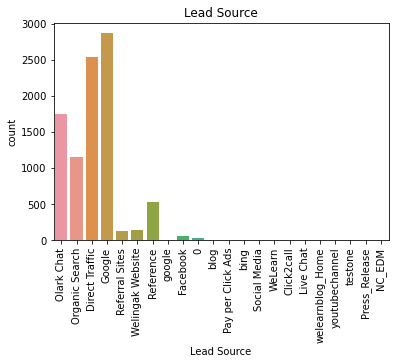

In [38]:
sns.countplot(leadframe['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

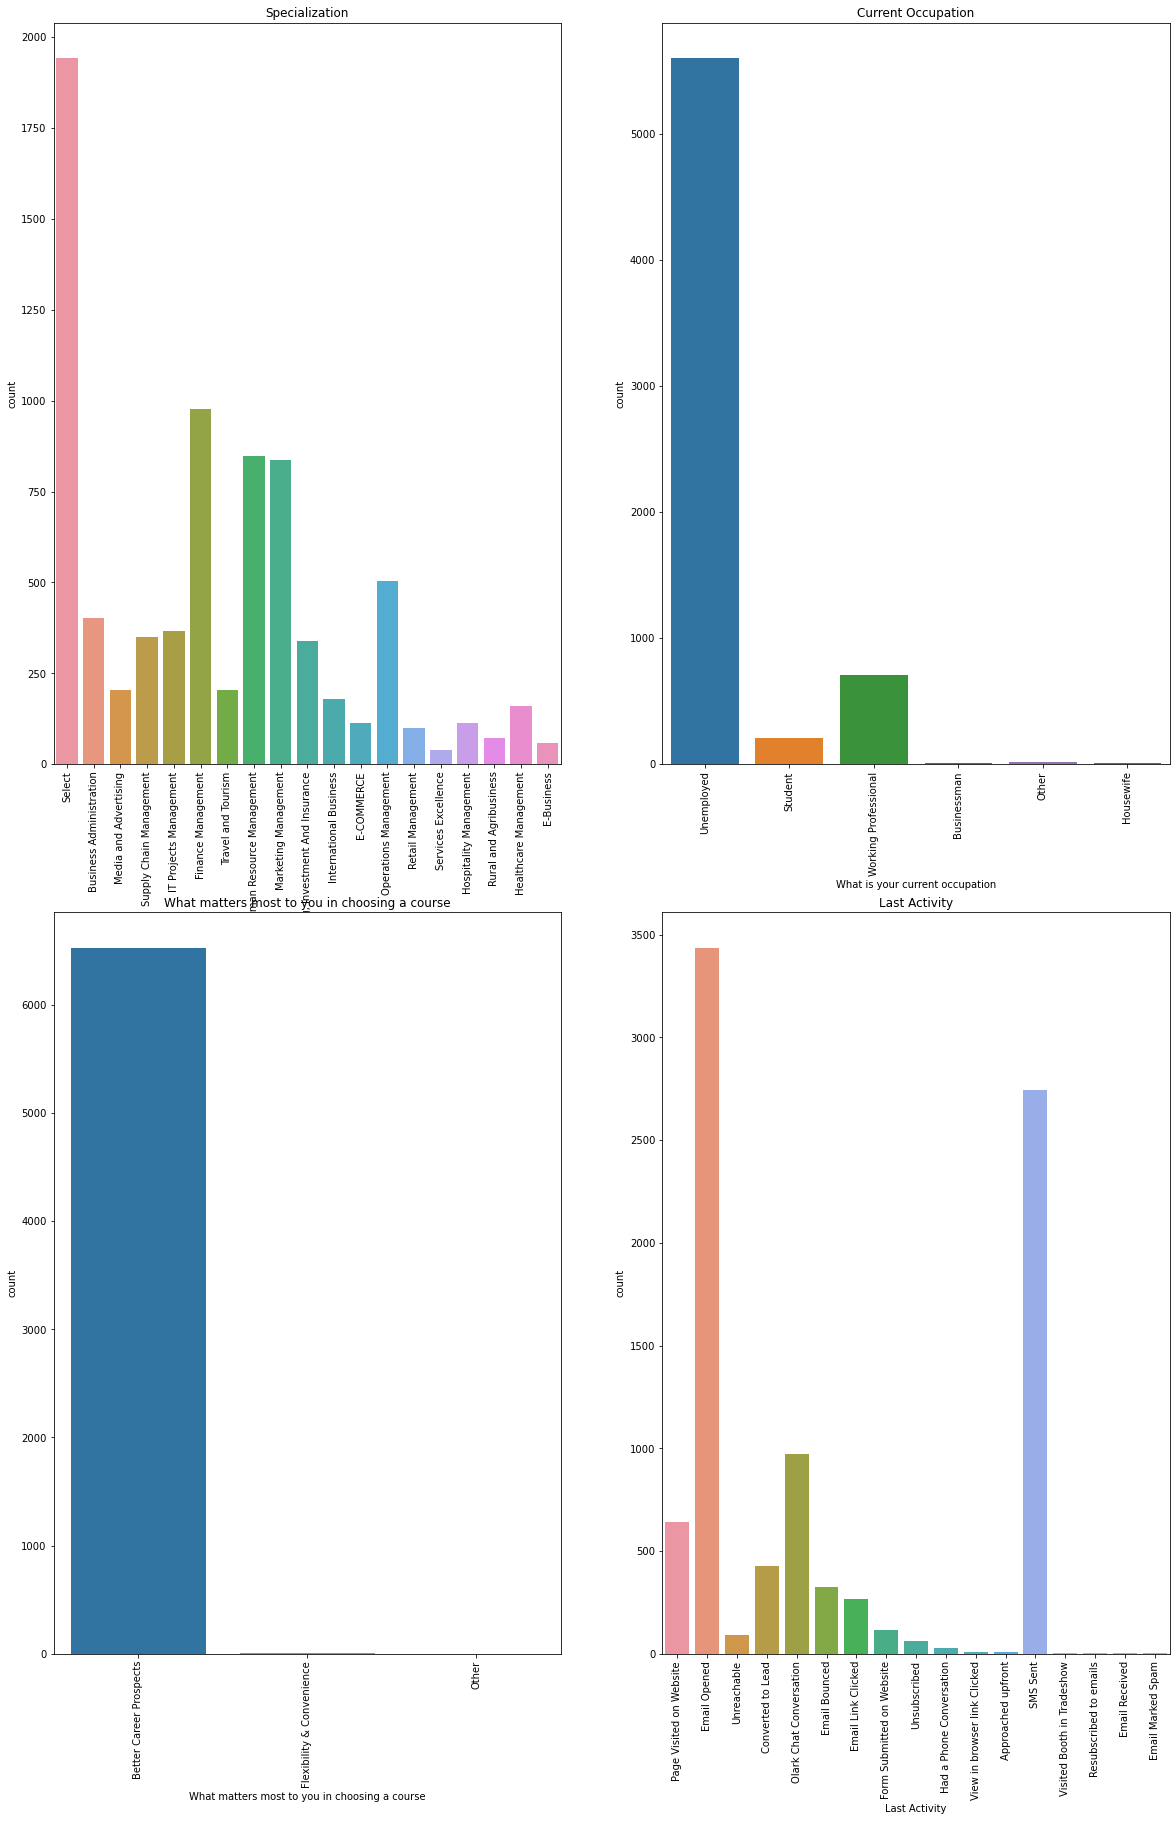

In [39]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Lead_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Lead_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(Lead_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(Lead_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

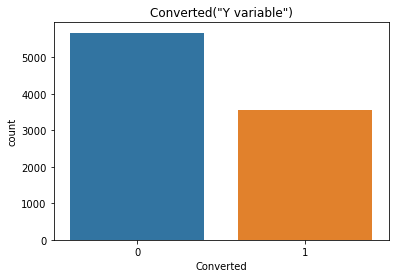

In [40]:
sns.countplot(Lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

# Numerical variable

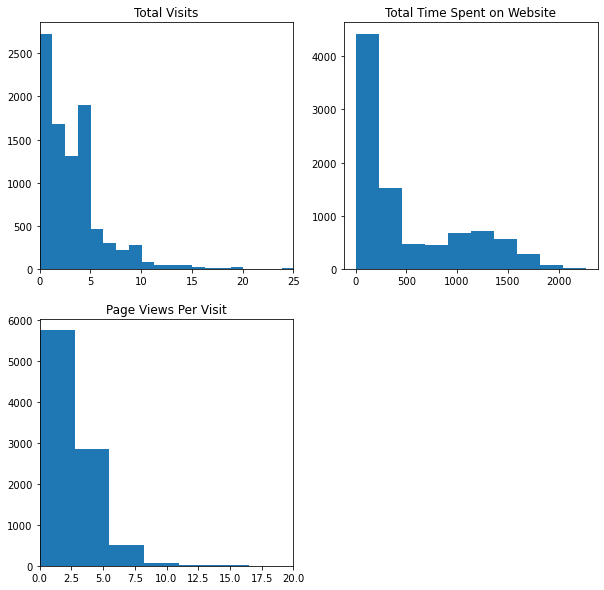

In [41]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leadframe['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leadframe['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leadframe['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

# Relating all the categorical variables to Converted¶

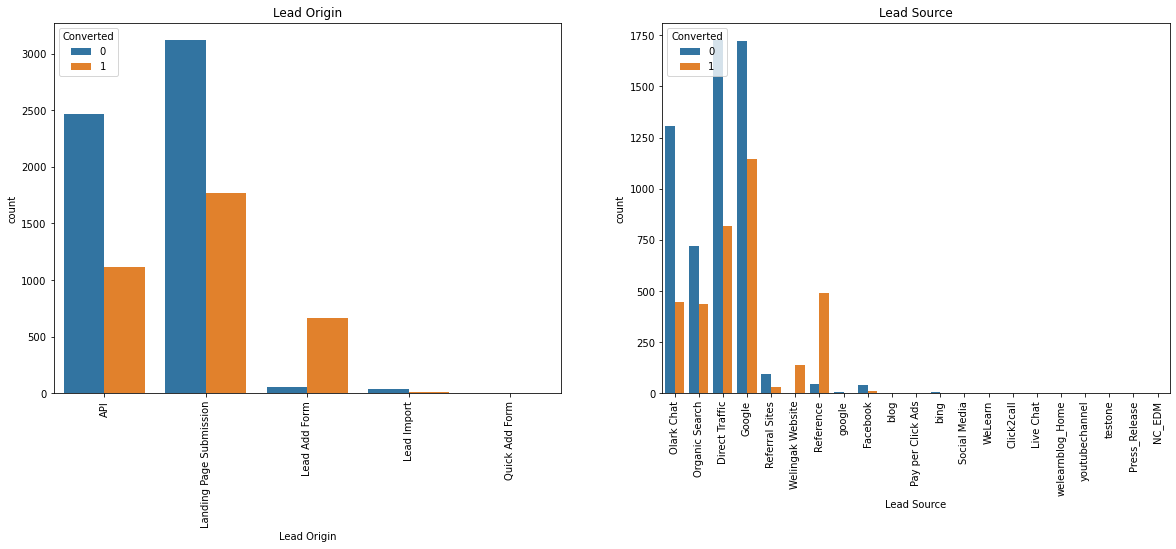

In [42]:
plt.figure(figsize = (20,15))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


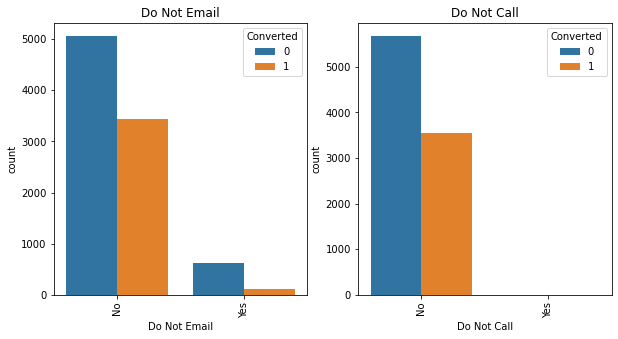

In [43]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

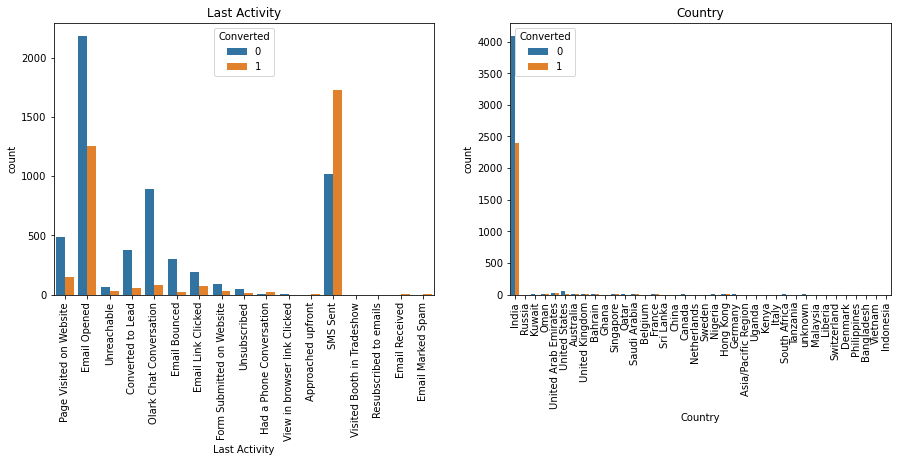

In [44]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

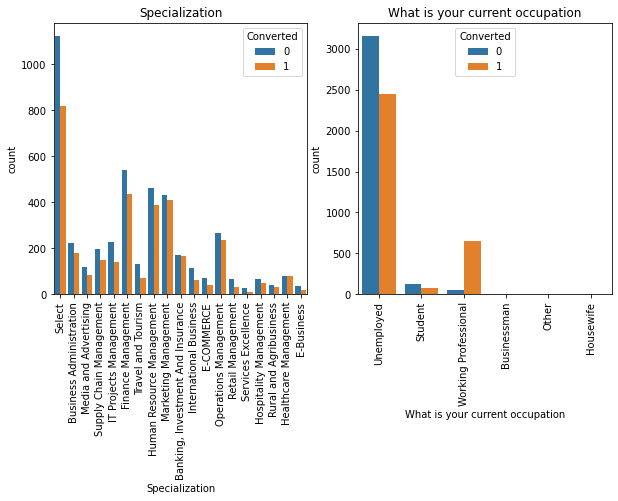

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

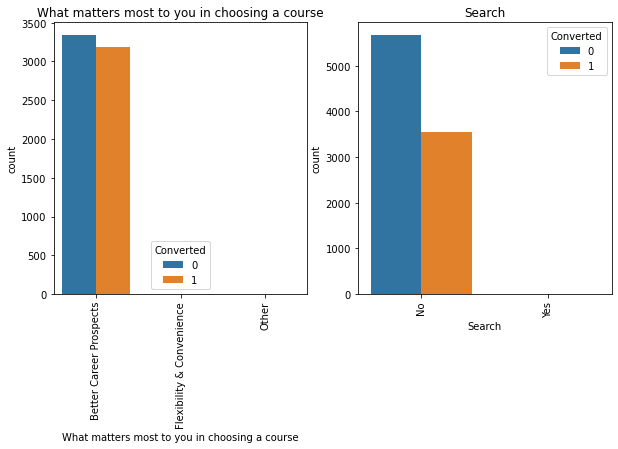

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

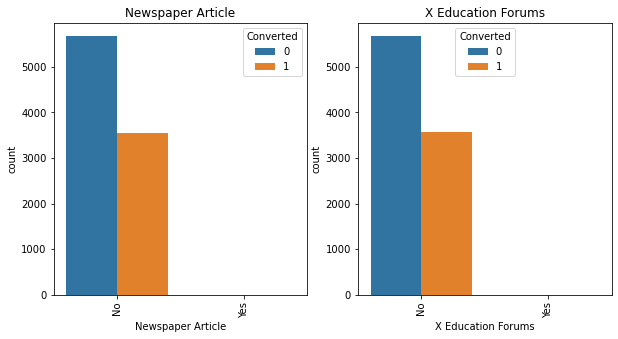

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

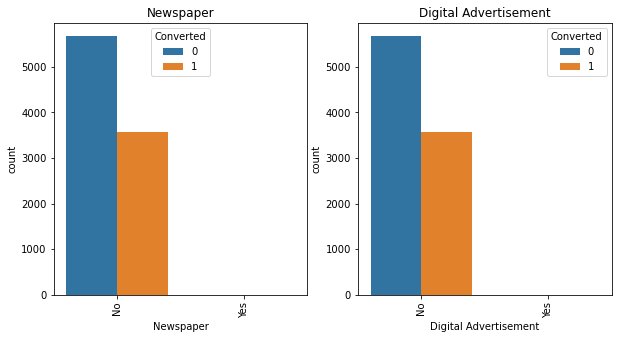

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

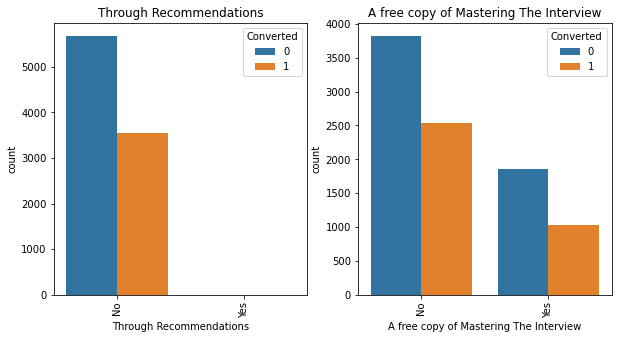

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

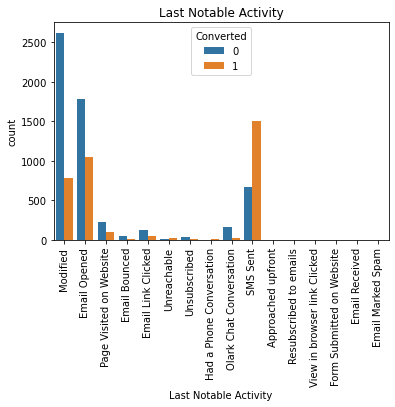

In [50]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

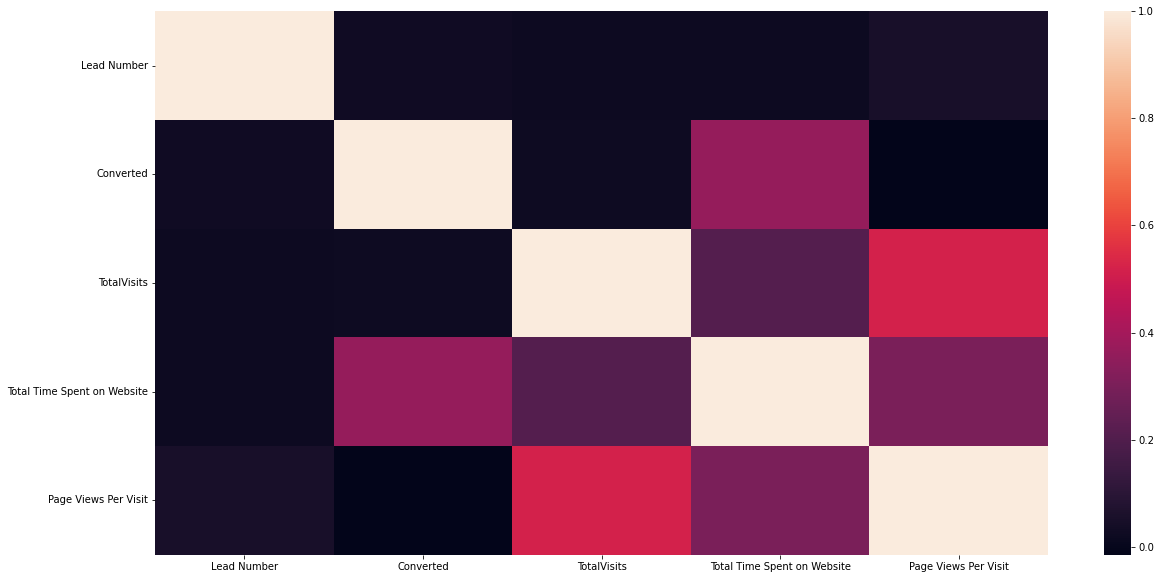

In [51]:
# To check the correlation among varibles
plt.figure(figsize=(20,10))
sns.heatmap(leadframe.corr())
plt.show()

# Outliers

In [52]:
numeric = leadframe[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


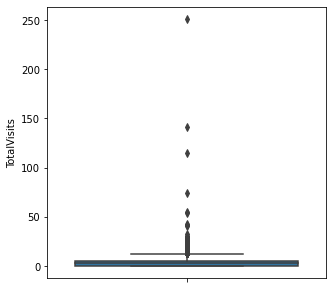

In [53]:
plt.figure(figsize = (5,5))
sns.boxplot(y=leadframe['TotalVisits'])
plt.show()

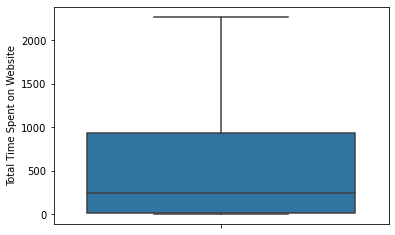

In [54]:
sns.boxplot(y=leadframe['Total Time Spent on Website'])
plt.show()

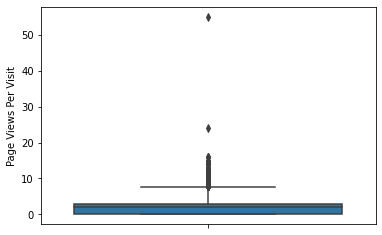

In [55]:
sns.boxplot(y=leadframe['Page Views Per Visit'])
plt.show()

We can see presence of outliers in TotalVisits and Page Views per Visit.

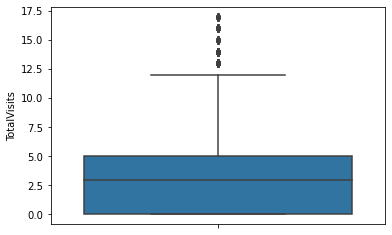

In [56]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leadframe.TotalVisits.quantile(0.99)
leadframe = leadframe[(leadframe.TotalVisits <= Q3)]
Q1 = leadframe.TotalVisits.quantile(0.01)
leadframe = leadframe[(leadframe.TotalVisits >= Q1)]
sns.boxplot(y=leadframe['TotalVisits'])
plt.show()

# Dummy Variables

In [57]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

We can drop "Tags" ,As tags variable is generated by the sales sales team after the disscussion with student otherwise it will increase the model accuracy.

In [58]:
leadframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9157 non-null   int64  
 1   Lead Origin                                    9157 non-null   object 
 2   Lead Source                                    9157 non-null   object 
 3   Do Not Email                                   9157 non-null   object 
 4   Do Not Call                                    9157 non-null   object 
 5   Converted                                      9157 non-null   int64  
 6   TotalVisits                                    9157 non-null   float64
 7   Total Time Spent on Website                    9157 non-null   int64  
 8   Page Views Per Visit                           9157 non-null   float64
 9   Last Activity                                  9157 

In [59]:
#getting a list of categorical columns

cat_cols= leadframe.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Update me on Supply Chain Content', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [60]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leadframe[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','How did you hear about X Education', 'Last Notable Activity','Lead Profile']], drop_first=True)

In [61]:
# Add the results to the master dataframe
leadframe_dum = pd.concat([leadframe, dummy], axis=1)
leadframe_dum

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_not provided
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,0,0,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,0,0,0,0,0,0,0,1,0,0
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,0,1,0,0,0,0,0,1,0,0
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,0,1,0,0,0,0,0,1,0,0
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,0,1,0,0,0,0,0,0,0,1


In [62]:
leadfinal_dum = leadframe_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Last Notable Activity'], 1)

In [63]:
leadfinal_dum

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,How did you hear about X Education,Update me on Supply Chain Content,Lead Profile,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_not provided
0,660737,0,0.0,0,0.00,NaN,No,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,NaN,No,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,NaN,No,Potential Lead,1,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.00,Word Of Mouth,No,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,Other,No,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,NaN,No,Potential Lead,1,0,...,0,0,0,0,0,0,0,1,0,0
9236,579546,0,2.0,238,2.00,NaN,No,Potential Lead,1,0,...,0,1,0,0,0,0,0,1,0,0
9237,579545,0,2.0,199,2.00,NaN,No,Potential Lead,1,0,...,0,1,0,0,0,0,0,1,0,0
9238,579538,1,3.0,499,3.00,Online Search,No,not provided,1,0,...,0,1,0,0,0,0,0,0,0,1


In [64]:
leadfinal_dum=leadfinal_dum.drop(['How did you hear about X Education','Update me on Supply Chain Content','Lead Profile','Lead Number'],1)

# Test-Train Split

In [65]:
 #Import the required library
from sklearn.model_selection import train_test_split

In [66]:
X = leadfinal_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_not provided
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Putting the target variable in y
y = leadfinal_dum['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [69]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_not provided
4418,0.235294,0.666223,0.2500,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3517,0.176471,0.149578,0.1875,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4639,0.117647,0.040391,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1904,0.235294,0.022636,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3044,0.235294,0.402130,0.2500,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Model Building

In [70]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [71]:
# Import RFE
from sklearn.feature_selection import RFE

In [72]:
# Running RFE with 15 variables as output
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [73]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 70),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Specialization_Business Administration', False, 77),
 ('Specialization_E-Business', False, 40),
 ('Specialization_E-COMMERCE', False, 31),
 ('Specialization_Finance Management', False, 38),
 ('Specialization_Healthcare Management', False, 53),
 ('Specialization_Hospitality Management', False, 68),
 ('Specialization_Human Resource Management', False, 41),
 ('Specialization_IT Projects Management', False, 36),
 ('Specialization_International Business', False, 74),
 ('Specialization_Marketing Management', False, 43),
 ('Specialization_Media and Advertising', False, 46),
 ('Specialization_Operations Management', False, 39),
 ('Specialization_Retail Management', False, 23),
 ('Specialization_Rural and Agribu

In [74]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [75]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [76]:
# Importing statsmodels
import statsmodels.api as sm

In [77]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2511.1
Date:                Tue, 09 Aug 2022   Deviance:                       5022.3
Time:                        22:01:46   Pearson chi2:                 7.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9048      0.108    -26.915      0.000      -3.116      -2.693
TotalVisits                                              1.9001      0.294      6.463      0.000       1.324       2.476
Total Time Spent on Website                              4.6209      0.169     27.311      0.000       4.289       4.953
Page Views Per Visit                                    -1.6633      0.432     -3.846      0.000      -2.511      -0.816
Lead Origin_Lead Add Form                                3.3013      0.215     15.355      0.000       2.880       3.723
Lead Source_Olark Chat                                   1.4516      0.127     11.451      0.000       1.203       1.700
Lead Source_Welingak Website                             3.4080      1.029      3.311      0.001       1.391       5.425
Do Not Email_Yes                                        -1.3839      0.168     -8.237      0.000      -1.713      -1.055
Last Activity_Olark Chat Conversation                   -1.4126      0.172     -8.201      0.000      -1.750      -1.075
Last Activity_SMS Sent                                   1.4628      0.077     18.883      0.000       1.311       1.615
What is your current occupation_Housewife               23.1966    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Working Professional     2.4524      0.188     13.076      0.000       2.085       2.820
Last Notable Activity_Had a Phone Conversation           3.2787      1.163      2.820      0.005       1.000       5.558
Lead Profile_Lateral Student                             2.5114      1.073      2.340      0.019       0.407       4.615
Lead Profile_Potential Lead                              1.6752      0.098     17.025      0.000       1.482       1.868
Lead Profile_Student of SomeSchool                      -2.0617      0.459     -4.488      0.000      -2.962      -1.161
========================================================================================================================
"""

In [78]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.94
0,TotalVisits,4.76
1,Total Time Spent on Website,2.02
3,Lead Origin_Lead Add Form,1.60
8,Last Activity_SMS Sent,1.50
13,Lead Profile_Potential Lead,1.42
4,Lead Source_Olark Chat,1.41
7,Last Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.23


The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife'

In [80]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [81]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.1
Date:                Tue, 09 Aug 2022   Deviance:                       5042.2
Time:                        22:01:46   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8855      0.107    -26.843      0.000      -3.096      -2.675
TotalVisits                                              1.8966      0.293      6.479      0.000       1.323       2.470
Total Time Spent on Website                              4.5954      0.169     27.264      0.000       4.265       4.926
Page Views Per Visit                                    -1.6498      0.431     -3.828      0.000      -2.495      -0.805
Lead Origin_Lead Add Form                                3.3202      0.215     15.467      0.000       2.899       3.741
Lead Source_Olark Chat                                   1.4379      0.126     11.367      0.000       1.190       1.686
Lead Source_Welingak Website                             3.3761      1.029      3.281      0.001       1.359       5.393
Do Not Email_Yes                                        -1.3917      0.168     -8.285      0.000      -1.721      -1.063
Last Activity_Olark Chat Conversation                   -1.4199      0.172     -8.247      0.000      -1.757      -1.082
Last Activity_SMS Sent                                   1.4492      0.077     18.753      0.000       1.298       1.601
What is your current occupation_Working Professional     2.4420      0.187     13.033      0.000       2.075       2.809
Lead Profile_Lateral Student                             2.5013      1.073      2.330      0.020       0.397       4.605
Lead Profile_Potential Lead                              1.6826      0.098     17.154      0.000       1.490       1.875
Lead Profile_Student of SomeSchool                      -2.0684      0.459     -4.503      0.000      -2.969      -1.168
========================================================================================================================
"""

In [82]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.94
0,TotalVisits,4.76
1,Total Time Spent on Website,2.02
3,Lead Origin_Lead Add Form,1.59
8,Last Activity_SMS Sent,1.49
11,Lead Profile_Potential Lead,1.42
4,Lead Source_Olark Chat,1.41
7,Last Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.31
9,What is your current occupation_Working Profes...,1.23


In [83]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2528.5
Date:                Tue, 09 Aug 2022   Deviance:                       5057.0
Time:                        22:01:46   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0330      0.101    -29.940      0.000      -3.232      -2.834
TotalVisits                                              1.2584      0.239      5.259      0.000       0.789       1.727
Total Time Spent on Website                              4.5848      0.168     27.258      0.000       4.255       4.914
Lead Origin_Lead Add Form                                3.4777      0.211     16.486      0.000       3.064       3.891
Lead Source_Olark Chat                                   1.5887      0.121     13.163      0.000       1.352       1.825
Lead Source_Welingak Website                             3.3774      1.029      3.282      0.001       1.360       5.394
Do Not Email_Yes                                        -1.4018      0.168     -8.361      0.000      -1.730      -1.073
Last Activity_Olark Chat Conversation                   -1.4071      0.172     -8.179      0.000      -1.744      -1.070
Last Activity_SMS Sent                                   1.4196      0.077     18.512      0.000       1.269       1.570
What is your current occupation_Working Professional     2.4179      0.187     12.924      0.000       2.051       2.785
Lead Profile_Lateral Student                             2.5144      1.070      2.350      0.019       0.417       4.612
Lead Profile_Potential Lead                              1.6880      0.098     17.239      0.000       1.496       1.880
Lead Profile_Student of SomeSchool                      -2.0467      0.460     -4.447      0.000      -2.949      -1.145
========================================================================================================================
"""

In [85]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.97
0,TotalVisits,1.94
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.44
10,Lead Profile_Potential Lead,1.42
3,Lead Source_Olark Chat,1.40
6,Last Activity_Olark Chat Conversation,1.38
4,Lead Source_Welingak Website,1.31
8,What is your current occupation_Working Profes...,1.23
5,Do Not Email_Yes,1.06


# All the VIF values are good.So we can fix model

In [86]:
#Creating Prediction
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4418    0.850326
3517    0.028556
4639    0.062987
1904    0.067037
3044    0.628630
3296    0.831991
5332    0.064398
7070    0.417962
5307    0.780471
2098    0.190878
dtype: float64

In [87]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85032566, 0.02855563, 0.06298697, 0.06703706, 0.6286304 ,
       0.83199106, 0.06439757, 0.41796203, 0.78047102, 0.19087771])

In [88]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.850326
1,0,0.028556
2,0,0.062987
3,0,0.067037
4,1,0.628630


In [89]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.850326,1
1,0,0.028556,0
2,0,0.062987,0
3,0,0.067037,0
4,1,0.628630,1


# Model Evaluation

In [90]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [91]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3515,  423],
       [ 740, 1731]], dtype=int64)

In [92]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8185364331408956

That's around 82% accuracy with is a very good value.

In [93]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [94]:
# Calculating the sensitivity
TP/(TP+FN)

0.7005261027923917

In [95]:
# Calculating the specificity
TN/(TN+FP)

0.8925850685627222

we have around 82% accuracy, sensitivity of around 70% and specificity of around 89%.

# Optimise Cut off (ROC Curve)

In [96]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

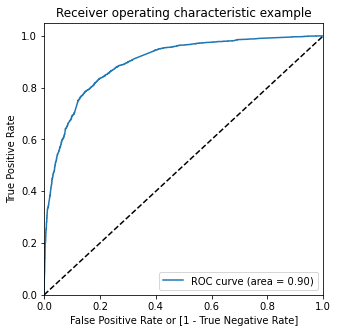

In [98]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value

In [99]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.850326,1,1,1,1,1,1,1,1,1,1,0
1,0,0.028556,0,1,0,0,0,0,0,0,0,0,0
2,0,0.062987,0,1,0,0,0,0,0,0,0,0,0
3,0,0.067037,0,1,0,0,0,0,0,0,0,0,0
4,1,0.628630,1,1,1,1,1,1,1,1,0,0,0


In [100]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385552,1.000000,0.000000
0.1,0.1,0.657357,0.969648,0.461402
0.2,0.2,0.771883,0.906111,0.687659
0.3,0.3,0.807146,0.849049,0.780853
0.4,0.4,0.824310,0.789964,0.845861
0.5,0.5,0.818536,0.700526,0.892585
0.6,0.6,0.814948,0.641845,0.923565
0.7,0.7,0.796224,0.556050,0.946927
0.8,0.8,0.770011,0.450830,0.970289
0.9,0.9,0.722734,0.296236,0.990350


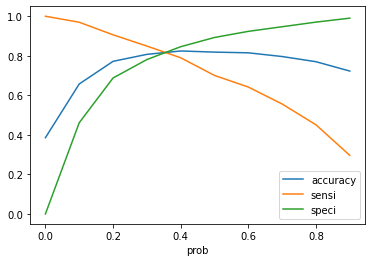

In [101]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.850326,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.028556,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.062987,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.067037,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.628630,1,1,1,1,1,1,1,1,0,0,0,1


In [103]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8177562802309253

In [104]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3218,  720],
       [ 448, 2023]], dtype=int64)

In [105]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [106]:
# Calculating the sensitivity
TP/(TP+FN)

0.8186968838526912

In [107]:
# Calculating the specificity
TN/(TN+FP)

0.8171660741493144

In [108]:
# With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80% to 82%.

# Precision-Recall

In [109]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3515,  423],
       [ 740, 1731]], dtype=int64)

In [110]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8036211699164345

In [111]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7005261027923917

With the current cut off as 0.35 we have Precision around 80% and Recall around 70%___

# Precision and recall tradeoff

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6404    1
 6405    0
 6406    1
 6407    0
 6408    0
 Name: Converted, Length: 6409, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6404    1
 6405    0
 6406    1
 6407    0
 6408    0
 Name: Predicted, Length: 6409, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

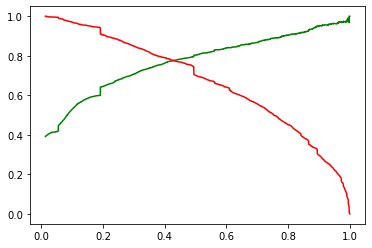

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.850326,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.028556,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.062987,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.067037,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.628630,1,1,1,1,1,1,1,1,0,0,0,1


In [117]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8271181151505695

In [118]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3360,  578],
       [ 530, 1941]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7705438666137356

In [121]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7855119384864427

With the current cut off as 0.41 we have Precision around 77% and Recall around 78%___

# Prediction on Test set

In [129]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [130]:
# Substituting all the columns in the final train model
col = X_train.columns

In [131]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
5499,1.0,0.529412,0.573014,0,0,0,1,0,0,0,0,0,0
6285,1.0,0.176471,0.040834,0,0,0,0,1,0,0,0,0,0
3474,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0
6370,1.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0
2545,1.0,0.176471,0.586329,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,1.0,0.176471,0.144252,0,0,0,0,0,0,0,0,0,0
5222,1.0,0.117647,0.118953,0,0,0,0,0,0,0,0,0,0
3939,1.0,0.176471,0.001775,0,0,0,0,0,0,0,0,1,0
3662,1.0,0.588235,0.389259,0,0,0,0,0,0,0,0,0,0


In [132]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.242061
1,0,0.017450
2,0,0.054608
3,1,0.493811
4,0,0.469358


In [139]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.242061,0
1,0,0.017450,0
2,0,0.054608,0
3,1,0.493811,1
4,0,0.469358,1
...,...,...,...
2743,0,0.104372,0
2744,0,0.087898,0
2745,0,0.246972,0
2746,0,0.375643,0


In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8213245997088792

In [141]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1423,  271],
       [ 220,  834]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7547511312217194

In [144]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7912713472485768



With the current cut off as 0.41 we have Precision around 75% , Recall around 79% and accuracy 82.5%.

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

The most potential buyers are:

In [146]:
# TotalVisits
#The total time spend on the Website.
#Lead Origin_Lead Add Form
#Lead Source_Google
#Lead Source_Direct Traffic
#Lead Source_Welingak Website
#Do Not Email_Yes
#Last Activity_Olark Chat Conversation